In [22]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [24]:
country_job_data=df.pivot_table(values='salary_year_avg',index='job_country',columns='job_title_short',aggfunc='median')
top_countries=df['job_country'].value_counts().head(6).index
country_job_data=country_job_data.loc[top_countries]
data_of_jobs=['Data Analyst','Data Engineer','Data Engineer']
country_job_data=country_job_data[data_of_jobs]
country_job_data

job_title_short,Data Analyst,Data Engineer,Data Engineer
job_country,,,
United States,90000.0,125000.0,125000.0
India,100500.0,147500.0,147500.0
United Kingdom,87750.0,110000.0,110000.0
France,69175.0,98301.5,98301.5
Germany,103750.0,147500.0,147500.0
Spain,91977.0,133000.0,133000.0


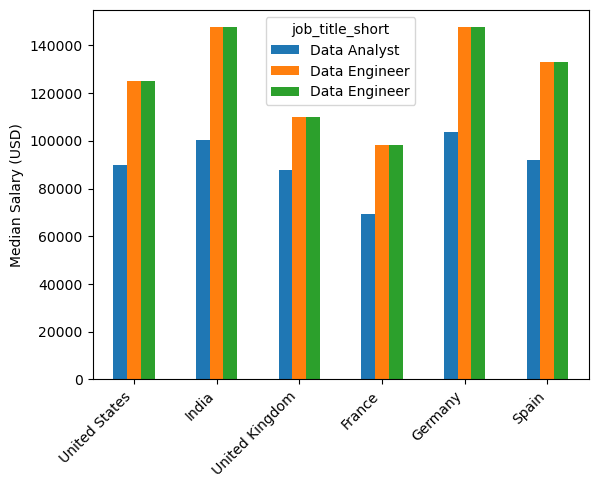

In [27]:
country_job_data.plot(kind='bar')
plt.ylabel('Median Salary (USD)')
plt.xlabel('')
plt.xticks(rotation=45,ha='right')
plt.show()